In [1]:
# Not identical to text

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# states (C is terminal)
A, B, C = 0, 1, 2
STATE_COUNT = 3

# actions
LEFT, RIGHT = 0, 1
ACTION_COUNT = 2

# Mean and variance for rewards from B
mu, sigma = -0.1, 1.0

class SmallMDP:
    def __init__(self):
        self.reset()
    
    def step(self, a):    
        """
        Execute action a. Returns tuple (next_state, reward, done)
        """
        if self.state == C:
            return C, 0, True
        if a == RIGHT:
            # Transition from A to terminal state
            self.state = C
            return self.state, 0, True
        else:
            # Transition to B and then to terminal state
            self.state = C
            reward = sigma * np.random.randn(1) + mu
            return self.state, reward[0], True            
    
    def reset(self):
        self.state = A
        return self.state

In [25]:
def epoch_greedy(Q, epsilon, state):
    qa = Q[state]
    prob = np.random.rand(1)
    if prob > epsilon:
        # exploit (greedy)
        action_index = np.random.choice(np.flatnonzero(qa == qa.max()))
    else:
        # explore (random action)
        action_index = np.random.randint(0, ACTION_COUNT)
    
    return action_index

In [44]:
epsilon = 0.1
alpha = 0.1
gamma = 1
episodes = 300
runs = 10000

env = SmallMDP()
Q = np.zeros((STATE_COUNT, ACTION_COUNT))
left_ql = np.zeros(episodes)

for run in range(runs):    
    for episode in range(episodes):
        s = env.reset()
        
        # Select action using policy derived from Q (e-greedy)
        a = epoch_greedy(Q, epsilon, s)

        # Take action and observe next state and reward
        s_, r, done = env.step(a)
        
        # Choose A' from S' using policy derived from Q (e-greedy)
        a_ = epoch_greedy(Q, epsilon, s_)

        # Update (Always terminal state after first action, thus Q(s_, a) = 0)
        Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_, a_] - Q[s, a])
        
        if a == LEFT:
            left_ql[episode] += 1

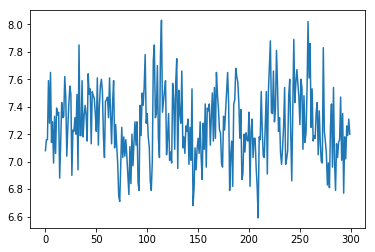

In [45]:
ql_y = left_ql / runs * 100
plt.plot(range(episodes), ql_y)
plt.show()